In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pickle

In [2]:
def diagnose_dip_defend(data):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    logits_dict = {}
    for k_idx, k in enumerate(
        ['original_img', 'attacked_img', 'psnr_max_defense_img', 'ses_defense_img']
    ):
        img_to_plot, logits = data[k]
        logits_dict[k] = logits
        if img_to_plot.ndim == 4:
            axs[k_idx].imshow(img_to_plot[0].transpose(1, 2, 0))
        else:
            axs[k_idx].imshow(img_to_plot.transpose(1, 2, 0))
        axs[k_idx].set_title(k)
    plt.show()
    psnr_unsmoothed = data["defense_info"]["series"]
    psnr_smoothed = data["defense_info"]["out_series"]
    dip_losses = torch.tensor(data["defense_info"]["dip_losses"]).numpy()

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    axs[0].plot(psnr_unsmoothed, label="unsmoothed")
    axs[0].plot(psnr_smoothed, label="smoothed")
    axs[0].set_title("PSNR over iterations")
    axs[0].legend()
    axs[1].plot(dip_losses)
    axs[1].set_title("DIP Loss over iterations")
    axs[1].set_yscale("log")
    plt.show()
    top_5_classes = {
        k: torch.topk(torch.from_numpy(logits), 5).indices.tolist() for k, logits in logits_dict.items()
    }
    print(top_5_classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04939644..1.0226897].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10318977..1.0358605].


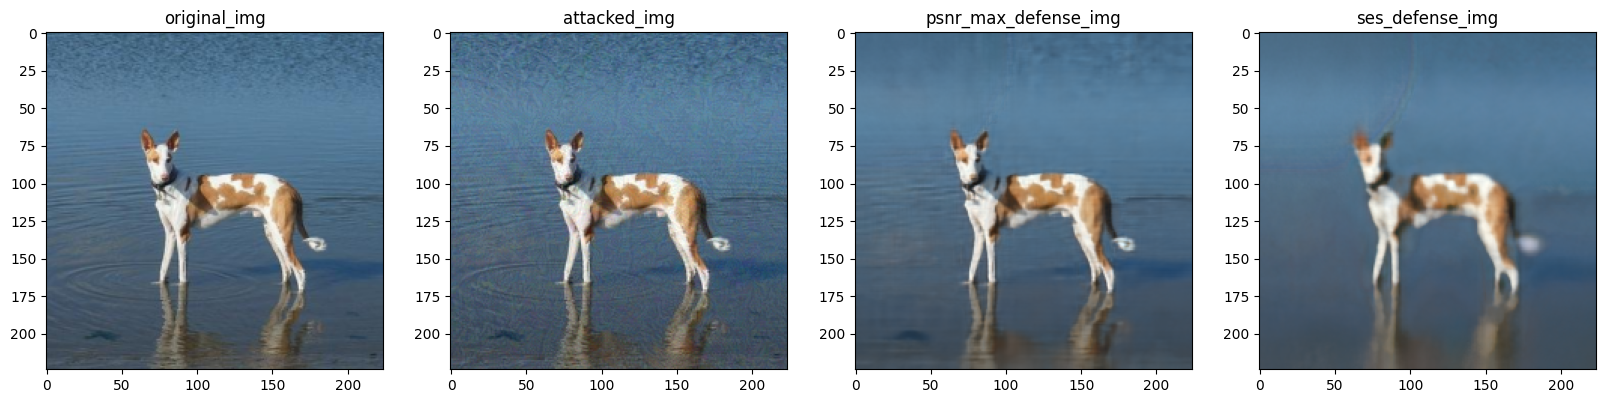

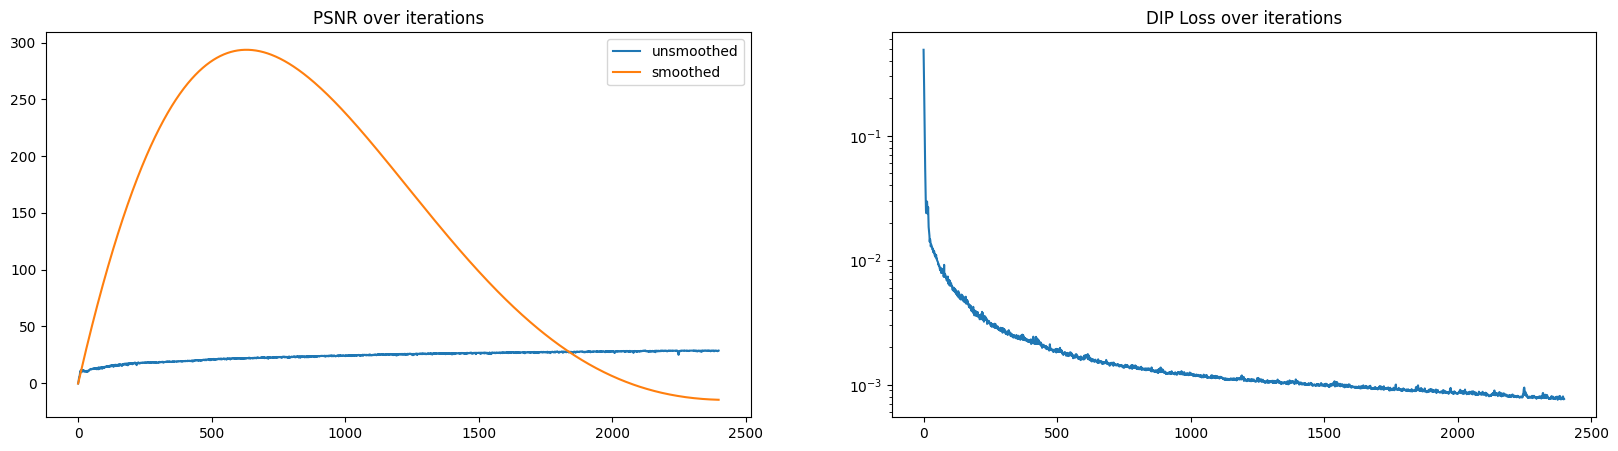

{'original_img': [[173, 253, 172, 171, 176]], 'attacked_img': [[280, 278, 277, 272, 335]], 'psnr_max_defense_img': [[173, 253, 172, 171, 167]], 'ses_defense_img': [[173, 171, 167, 172, 215]]}


In [3]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_0_status.pt"
with open(file_name, "rb") as f:
    another_attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(another_attack_data)
del another_attack_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.006583537..1.0317229].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008316161..1.0307058].


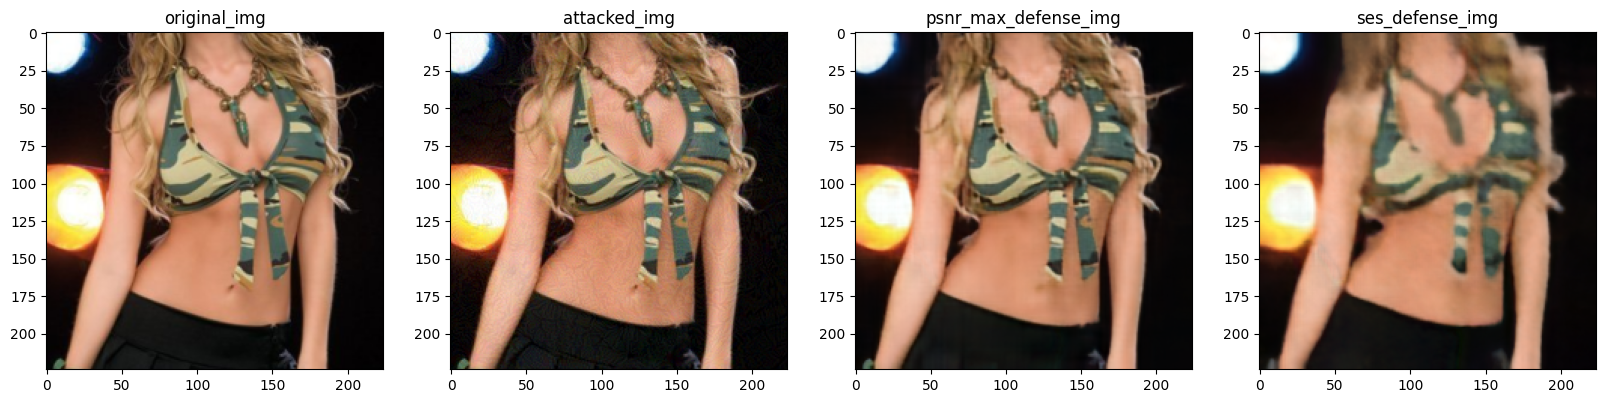

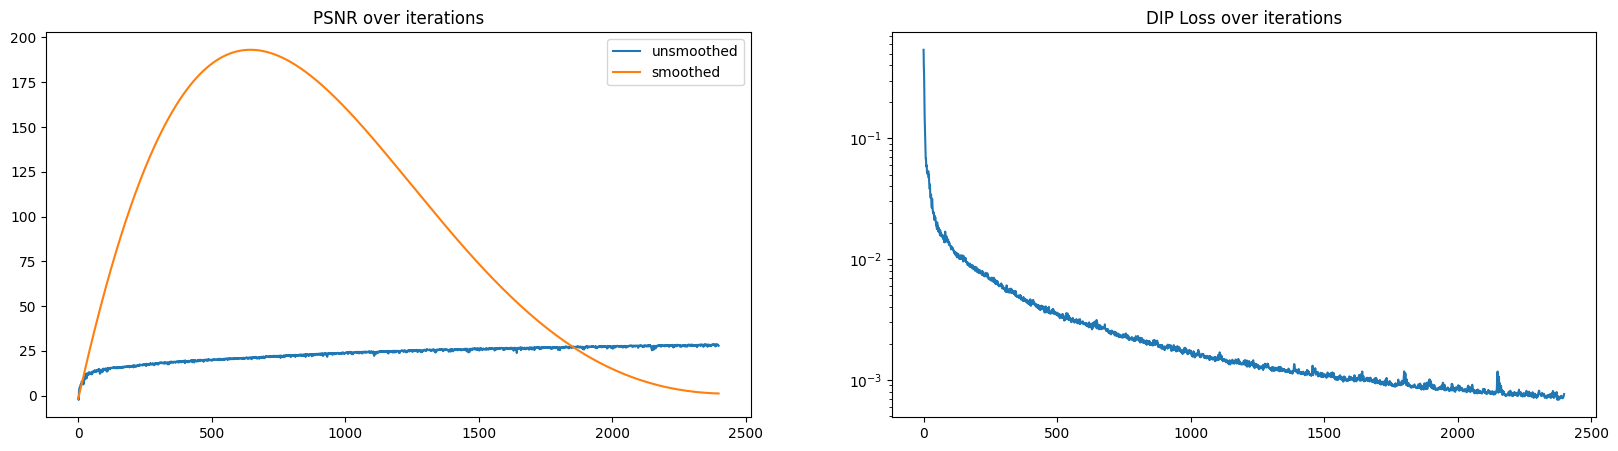

{'original_img': [[655, 638, 445, 459, 639]], 'attacked_img': [[890, 768, 805, 430, 429]], 'psnr_max_defense_img': [[459, 445, 638, 655, 890]], 'ses_defense_img': [[655, 842, 638, 465, 459]]}


In [4]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_1_status.pt"
with open(file_name, "rb") as f:
    attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(attack_data)
del attack_data

In [ ]:
file_name = "/home/bransthr/projects/aip-florian7/bransthr/DIPDefend/script_logpoint/attack_2_status.pt"
with open(file_name, "rb") as f:
    attack_data = torch.load(f, map_location="cpu", weights_only=False)
f.close()
diagnose_dip_defend(attack_data)
del attack_data

## Preliminary stuff

Text(0.5, 1.0, 'Original Image')

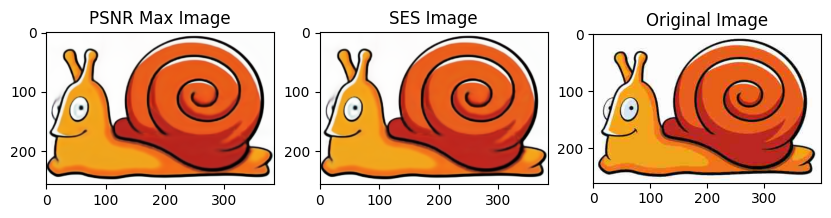

In [28]:
img_code = "snail"
original_img = plt.imread("./dataset/snail.jpg")
psnr_file_name = f"script_logpoint/PSNRMax_defended_{img_code}.npy"
ses_file_name = f"script_logpoint/SES_defended_{img_code}.npy"
psnr_data = np.load(psnr_file_name, allow_pickle=True)
ses_data = np.load(ses_file_name, allow_pickle=True)

figs, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(psnr_data.transpose(1, 2, 0))
axs[0].set_title("PSNR Max Image")
axs[1].imshow(ses_data.transpose(1, 2, 0))
axs[1].set_title("SES Image")
axs[2].imshow(original_img)
axs[2].set_title("Original Image")

Text(0.5, 1.0, 'Original Image')

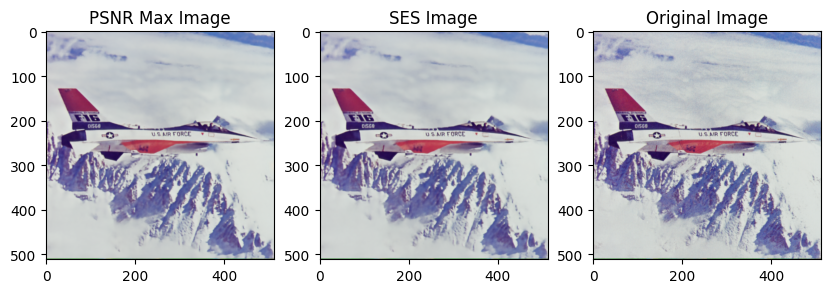

In [29]:
img_code = "F16_GT"
original_img = plt.imread("./dataset/F16_GT.png")
psnr_file_name = f"script_logpoint/PSNRMax_defended_{img_code}.npy"
ses_file_name = f"script_logpoint/SES_defended_{img_code}.npy"
psnr_data = np.load(psnr_file_name, allow_pickle=True)
ses_data = np.load(ses_file_name, allow_pickle=True)

figs, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(psnr_data.transpose(1, 2, 0))
axs[0].set_title("PSNR Max Image")
axs[1].imshow(ses_data.transpose(1, 2, 0))
axs[1].set_title("SES Image")
axs[2].imshow(original_img)
axs[2].set_title("Original Image")

In [31]:
plt.imread(
    "./dataset/mini-imagenet/images/n0287152500001298.jpg"
).shape

(375, 500, 3)